In [2]:
!pip install awswrangler

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached awswrangler-2.18.0-py3-none-any.whl (255 kB)
  Using cached numpy-1.23.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached botocore-1.29.27-py3-none-any.whl (10.2 MB)
  Using cached pg8000-1.29.3-py3-none-any.whl (51 kB)
  Using cached redshift_connector-2.0.909-py3-none-any.whl (112 kB)
  Using cached requests_aws4auth-1.1.2-py2.py3-none-any.whl (24 kB)
  Using cached opensearch_py-2.0.1-py2.py3-none-any.whl (214 kB)
  Using cached PyMySQL-1.0.2-py3-none-any.whl (43 kB)
  Using cached progressbar2-4.2.0-py2.py3-none-any.whl (27 kB)
  Using cached gremlinpython-3.6.1-py2.py3-none-any.whl (73 kB)
  Using cached backoff-2.2.1-py3-none-any.whl (15 kB)
  Using cached jsonpath_ng-1.5.3-py3-none-any.whl (29 kB)
  Using cached isodate-0.6.1-py2.py3-none-any.whl (41 kB)
  Using cached aenum-3.1.11-py3-none-any.whl (131 kB)
  Using cached scramp-1.4.4-py3-none-any.w

In [3]:
import awswrangler as wr

In [7]:
wr.s3.list_objects("s3://noaa-ghcn-pds/csv/by_year/")

['s3://noaa-ghcn-pds/csv/by_year/1750.csv',
 's3://noaa-ghcn-pds/csv/by_year/1763.csv',
 's3://noaa-ghcn-pds/csv/by_year/1764.csv',
 's3://noaa-ghcn-pds/csv/by_year/1765.csv',
 's3://noaa-ghcn-pds/csv/by_year/1766.csv',
 's3://noaa-ghcn-pds/csv/by_year/1767.csv',
 's3://noaa-ghcn-pds/csv/by_year/1768.csv',
 's3://noaa-ghcn-pds/csv/by_year/1769.csv',
 's3://noaa-ghcn-pds/csv/by_year/1770.csv',
 's3://noaa-ghcn-pds/csv/by_year/1771.csv',
 's3://noaa-ghcn-pds/csv/by_year/1772.csv',
 's3://noaa-ghcn-pds/csv/by_year/1773.csv',
 's3://noaa-ghcn-pds/csv/by_year/1774.csv',
 's3://noaa-ghcn-pds/csv/by_year/1775.csv',
 's3://noaa-ghcn-pds/csv/by_year/1776.csv',
 's3://noaa-ghcn-pds/csv/by_year/1777.csv',
 's3://noaa-ghcn-pds/csv/by_year/1778.csv',
 's3://noaa-ghcn-pds/csv/by_year/1779.csv',
 's3://noaa-ghcn-pds/csv/by_year/1780.csv',
 's3://noaa-ghcn-pds/csv/by_year/1781.csv',
 's3://noaa-ghcn-pds/csv/by_year/1782.csv',
 's3://noaa-ghcn-pds/csv/by_year/1783.csv',
 's3://noaa-ghcn-pds/csv/by_year

In [24]:
# only use 1850 decade

all_files = list(wr.s3.list_objects("s3://noaa-ghcn-pds/csv/by_year/"))
files_1850 = []
for f in all_files:
    if(f.find("185") != -1):
        files_1850.append(f)

In [25]:
files_1850

['s3://noaa-ghcn-pds/csv/by_year/1850.csv',
 's3://noaa-ghcn-pds/csv/by_year/1851.csv',
 's3://noaa-ghcn-pds/csv/by_year/1852.csv',
 's3://noaa-ghcn-pds/csv/by_year/1853.csv',
 's3://noaa-ghcn-pds/csv/by_year/1854.csv',
 's3://noaa-ghcn-pds/csv/by_year/1855.csv',
 's3://noaa-ghcn-pds/csv/by_year/1856.csv',
 's3://noaa-ghcn-pds/csv/by_year/1857.csv',
 's3://noaa-ghcn-pds/csv/by_year/1858.csv',
 's3://noaa-ghcn-pds/csv/by_year/1859.csv']

In [51]:
col_names = ["id", "dt", "element", "value", "m_flag", "q_flag", "s_flag", "obs_time"]

df = wr.s3.read_csv(
    path=files_1850,
    names=col_names,
    header=0,
    parse_dates=["dt", "obs_time"]  # Hint to parse these columns as date instead of strings
)

In [52]:
df

,id,dt,element,value,m_flag,q_flag,s_flag,obs_time
0,ASN00023000,1850-01-01,PRCP,0,NaN,NaN,a,NaT
1,BE000006447,1850-01-01,TMAX,28,NaN,NaN,I,NaT
2,BE000006447,1850-01-01,TMIN,-6,NaN,NaN,I,NaT
3,CA006158350,1850-01-01,TMAX,-6,NaN,NaN,C,NaT
4,CA006158350,1850-01-01,TMIN,-106,NaN,NaN,C,NaT
...,...,...,...,...,...,...,...,...
176132,USC00465224,1859-12-31,SNOW,0,NaN,NaN,6,NaT
176133,USC00465224,1859-12-31,WT16,1,NaN,NaN,6,NaT
176134,USP00CA0001,1859-12-31,PRCP,0,NaN,NaN,F,NaT
176135,USW00014838,1859-12-31,PRCP,0,NaN,NaN,F,NaT


In [55]:
df["year"] = df["dt"].dt.year

In [56]:
df

,id,dt,element,value,m_flag,q_flag,s_flag,obs_time,year
0,ASN00023000,1850-01-01,PRCP,0,NaN,NaN,a,NaT,1850
1,BE000006447,1850-01-01,TMAX,28,NaN,NaN,I,NaT,1850
2,BE000006447,1850-01-01,TMIN,-6,NaN,NaN,I,NaT,1850
3,CA006158350,1850-01-01,TMAX,-6,NaN,NaN,C,NaT,1850
4,CA006158350,1850-01-01,TMIN,-106,NaN,NaN,C,NaT,1850
...,...,...,...,...,...,...,...,...,...
176132,USC00465224,1859-12-31,SNOW,0,NaN,NaN,6,NaT,1859
176133,USC00465224,1859-12-31,WT16,1,NaN,NaN,6,NaT,1859
176134,USP00CA0001,1859-12-31,PRCP,0,NaN,NaN,F,NaT,1859
176135,USW00014838,1859-12-31,PRCP,0,NaN,NaN,F,NaT,1859


In [58]:
# attach glue service policy to IAM role 

wr.s3.to_parquet(
    df=df,
    path="s3://aws-blog-etldatawrangler/noaa/",
    dataset=True,
    database="aws_blog_datawranglerdb",
    table="noaa",
    partition_cols=["year"]
);

In [60]:
wr.s3.list_objects("s3://aws-blog-etldatawrangler/noaa/")

['s3://aws-blog-etldatawrangler/noaa/year=1850/a0b5ac51c3e64c10b5f6e9ab9c9835ac.snappy.parquet',
 's3://aws-blog-etldatawrangler/noaa/year=1851/a0b5ac51c3e64c10b5f6e9ab9c9835ac.snappy.parquet',
 's3://aws-blog-etldatawrangler/noaa/year=1852/a0b5ac51c3e64c10b5f6e9ab9c9835ac.snappy.parquet',
 's3://aws-blog-etldatawrangler/noaa/year=1853/a0b5ac51c3e64c10b5f6e9ab9c9835ac.snappy.parquet',
 's3://aws-blog-etldatawrangler/noaa/year=1854/a0b5ac51c3e64c10b5f6e9ab9c9835ac.snappy.parquet',
 's3://aws-blog-etldatawrangler/noaa/year=1855/a0b5ac51c3e64c10b5f6e9ab9c9835ac.snappy.parquet',
 's3://aws-blog-etldatawrangler/noaa/year=1856/a0b5ac51c3e64c10b5f6e9ab9c9835ac.snappy.parquet',
 's3://aws-blog-etldatawrangler/noaa/year=1857/a0b5ac51c3e64c10b5f6e9ab9c9835ac.snappy.parquet',
 's3://aws-blog-etldatawrangler/noaa/year=1858/a0b5ac51c3e64c10b5f6e9ab9c9835ac.snappy.parquet',
 's3://aws-blog-etldatawrangler/noaa/year=1859/a0b5ac51c3e64c10b5f6e9ab9c9835ac.snappy.parquet']

In [61]:
wr.catalog.table(database="aws_blog_datawranglerdb", table="noaa")

,Column Name,Type,Partition,Comment
0,id,string,False,
1,dt,timestamp,False,
2,element,string,False,
3,value,bigint,False,
4,m_flag,string,False,
5,q_flag,string,False,
6,s_flag,string,False,
7,obs_time,timestamp,False,
8,year,bigint,True,


In [62]:
sql = """
SELECT
    dt,
    (value / 10.0) AS temperature  -- Converting tenths of degrees C to regular degrees C
FROM noaa
WHERE year BETWEEN 1856 AND 1859  -- Only last 3 years (PARTITION filter)
AND substr(id, 1, 2)='US'  -- Only U.S. stations
AND element='TMAX'  -- Only Maximum temperature elements
AND q_flag is NULL  -- Only HIGH quality measurement
"""

temperature_df = wr.athena.read_sql_query(sql, database="aws_blog_datawranglerdb")

In [63]:
temperature_df

,dt,temperature
0,1857-03-10,8.9
1,1857-03-11,7.5
2,1857-03-14,3.1
3,1857-03-15,10.0
4,1857-03-16,13.6
...,...,...
993,1856-10-18,15.0
994,1856-10-19,17.2
995,1856-10-20,20.0
996,1856-10-21,21.1


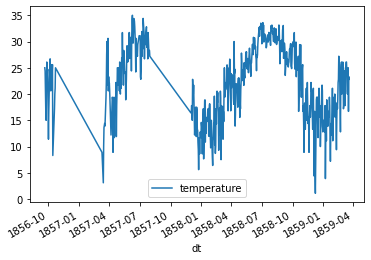

In [82]:
%matplotlib inline
temperature_df.groupby("dt").mean().plot();

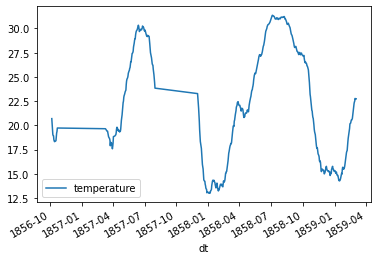

In [65]:
%matplotlib inline
temperature_df.groupby("dt").mean().rolling(window=30, center=True).mean().plot();

In [71]:
temperature_df.dtypes

dt             datetime64[ns]
temperature           float64
dtype: object

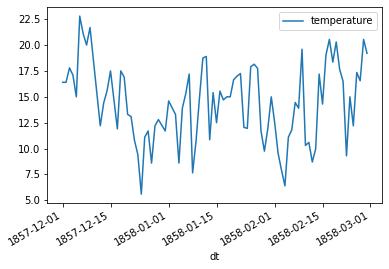

In [80]:
# examining the 1857-08 to 1858-01 values
%matplotlib inline
temperature_df[(temperature_df["dt"]>"1857-08") & (temperature_df["dt"]<"1858-03")].groupby("dt").mean().plot();